# U18CST7002 - MACHINE LEARNING TECHNIQUES

# Assignment - 1

## In this project, the team will evaluate the performance and predictive power of a model that has been trained and tested on data collected from your datasets.

## Team Members:

### 18BCS027 - Lokesh Kumar 
### 18BCS068 - Shivali Muthukumar
### 18BCS073 - Varshini 
### 18BCS091 - Shalini
### 18BCS093 - Kritya Shree

# 

## Dataset Chosen: Vehicle Insurance

### Attributes
#### id - Unique ID for the customer
#### Gender - Gender of the customer
#### Age - Age of the customer
#### Driving_License - 0: Customer does not have DL; 1 : Customer already has DL;
#### Region_Code - Unique code for the region of the customer
#### Previously_Insured - 1 : Customer already has Vehicle Insurance; 0 : Customer doesn't have Vehicle Insurance;
#### Vehicle_Age - Age of the Vehicle
#### Vehicle_Damage - 1 : Customer got his/her vehicle damaged in the past; 0 : Customer didn't get his/her vehicle damaged in the past;
#### Annual_Premium - The amount customer needs to pay as premium in the year
#### PolicySalesChannel - Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over #### Phone, In Person, etc.
#### Vintage - Number of Days, Customer has been associated with the company
#### Response - 1 : Customer is interested; 0 : Customer is not interested;

## 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import plotly as ply
import plotly.express as px

In [2]:
data = pd.read_csv('data.csv')
data.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
4995,4996,Male,36,1,8.0,0,> 2 Years,Yes,40278.0,124.0,62,0
4996,4997,Male,44,1,10.0,0,1-2 Year,Yes,27438.0,124.0,208,1
4997,4998,Male,58,1,28.0,0,1-2 Year,Yes,50889.0,26.0,105,0
4998,4999,Male,31,1,28.0,1,1-2 Year,No,36457.0,124.0,75,0
4999,5000,Male,63,1,2.0,1,1-2 Year,No,30791.0,26.0,40,0


### 

## 1. Calculate Statistics - Calculate the minimum, maximum, mean, median, and standard deviation of  the dataset

In [3]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,38.68200,0.997800,26.201000,0.441600,30929.683400,112.909600,156.145600,0.123800
std,1443.520003,15.47505,0.046857,13.173918,0.496627,16732.411341,53.607076,83.681385,0.329386
min,1.000000,20.00000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,1250.750000,24.00000,1.000000,15.000000,0.000000,24814.000000,40.750000,85.000000,0.000000
50%,2500.500000,36.00000,1.000000,28.000000,0.000000,31967.000000,136.000000,156.000000,0.000000
75%,3750.250000,49.00000,1.000000,35.000000,1.000000,39816.000000,152.000000,229.000000,0.000000
max,5000.000000,84.00000,1.000000,52.000000,1.000000,267698.000000,163.000000,299.000000,1.000000


In [4]:
df = data.copy()
df.shape

(5000, 12)

In [5]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

## 

## 2. Feature Observation - Dataset into Features

## Label Encoding

In [6]:
label_encoder = preprocessing.LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Vehicle_Age']= label_encoder.fit_transform(df['Vehicle_Age'])
df['Vehicle_Damage']= label_encoder.fit_transform(df['Vehicle_Damage'])

In [7]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,1,36,1,8.0,0,2,1,40278.0,124.0,62,0
4996,4997,1,44,1,10.0,0,0,1,27438.0,124.0,208,1
4997,4998,1,58,1,28.0,0,0,1,50889.0,26.0,105,0
4998,4999,1,31,1,28.0,1,0,0,36457.0,124.0,75,0


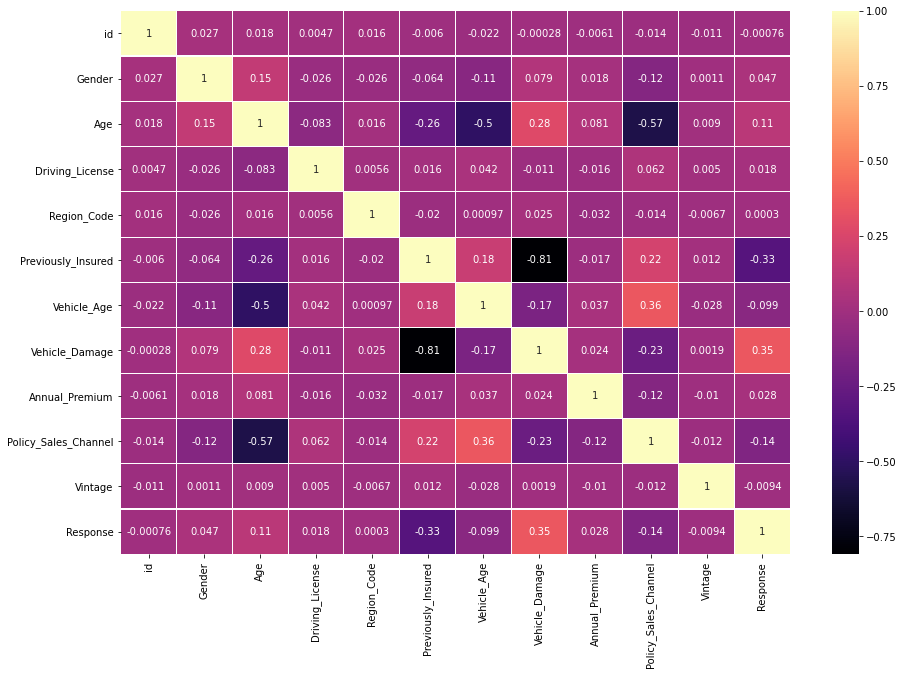

In [8]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, linewidths=0.05, cmap="magma")
plt.show()


### We have deleted the Columns which have very low correlation to 'Responses'. 

In [9]:
X=df.drop(['Response','id','Previously_Insured', 'Vehicle_Age', 'Policy_Sales_Channel', 'Vintage'],axis=1)
print(X.shape)
y=df['Response']
print(y.shape)

(5000, 6)
(5000,)


## Data Virtualisation

### Driving License vs Responses

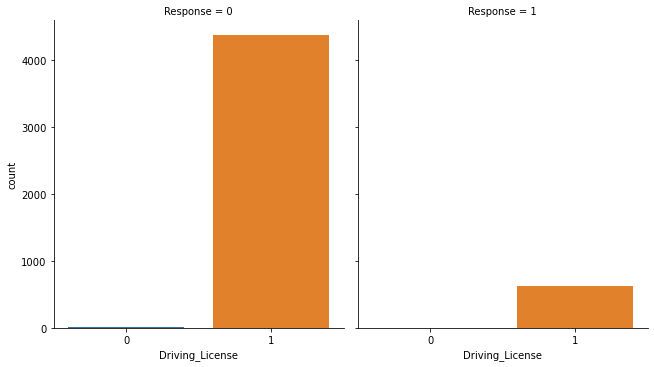

In [10]:
sample=data.groupby(['Driving_License','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
plot = sns.catplot(x="Driving_License", y="count",col="Response",
                data=sample, kind="bar",
                height=5, aspect=.9);

In [11]:
sample

,Driving_License,Response,count
0,0,0,11
1,1,0,4370
2,1,1,619


### Gender vs Age

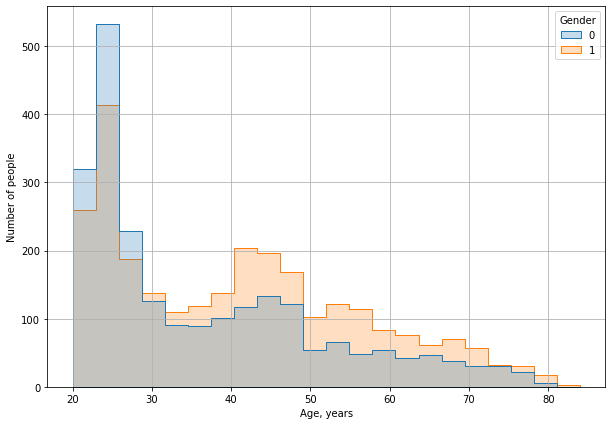

In [12]:
plt.figure(figsize=(10, 7))
sns.histplot(x=df['Age'], hue=df['Gender'], element='step', legend=True)
plt.xlabel('Age, years')
plt.ylabel('Number of people')
plt.grid()

/Users/kritya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual_Premium', ylabel='Density'>

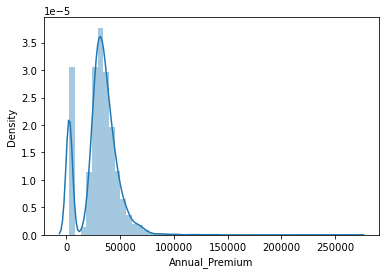

In [13]:
sns.distplot(df.Annual_Premium)

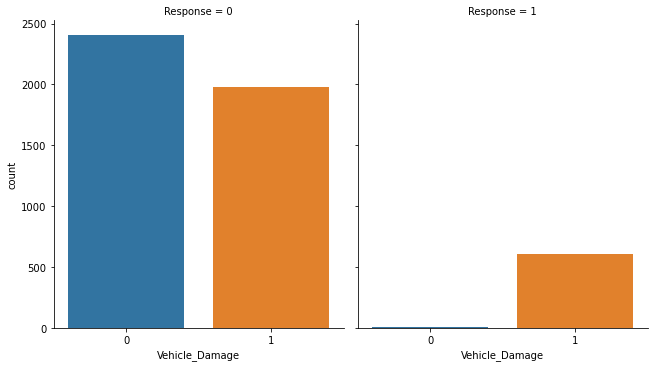

In [14]:
vd_r=df.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
plot = sns.catplot(x="Vehicle_Damage", y="count",col="Response",
                data=vd_r, kind="bar",
                height=5, aspect=.9);

In [15]:
vd_r

,Vehicle_Damage,Response,count
0,0,0,2405
1,0,1,10
2,1,0,1976
3,1,1,609


## 

## Developing a Model

### Dividing into training and testing

In [28]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report, mean_squared_error

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)
print(X_train.shape)
print(X_test.shape)

(4000, 6)
(1000, 6)


## Random Forest

In [30]:
print("RANDOM FOREST ALGORITHM \n")
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
y_pred=RFC.predict(X_test)

print("Classification Report is:\n",classification_report(y_test,y_pred))
print("\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("\nTraining Score:\n",RFC.score(X_test,y_test)*100)
print("\nMean Squared Error:\n",mean_squared_error(y_test,y_pred))

print("\nModel Accuracy:\n",accuracy_score(y_test,y_pred)*100)

RANDOM FOREST ALGORITHM 

Classification Report is:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       877
           1       0.32      0.15      0.21       123

    accuracy                           0.86      1000
   macro avg       0.61      0.55      0.56      1000
weighted avg       0.82      0.86      0.83      1000


Confusion Matrix:
 [[837  40]
 [104  19]]

Training Score:
 85.6

Mean Squared Error:
 0.144

Model Accuracy:
 85.6


## 

## Linear SVM

In [31]:
print("LINEAR SVM")
LSVM = SVC(kernel='linear')
LSVM.fit(X_train,y_train)
y_pred=LSVM.predict(X_test)

print("Classification Report is:\n",classification_report(y_test,y_pred))
print("\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("\nTraining Score:\n",LSVM.score(X_test,y_test)*100)
print("\nMean Squared Error:\n",mean_squared_error(y_test,y_pred))

print("\nModel Accuracy:\n",accuracy_score(y_test,y_pred)*100)

LINEAR SVM
Classification Report is:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       877
           1       0.11      0.02      0.03       123

    accuracy                           0.86      1000
   macro avg       0.49      0.50      0.48      1000
weighted avg       0.78      0.86      0.82      1000


Confusion Matrix:
 [[860  17]
 [121   2]]

Training Score:
 86.2

Mean Squared Error:
 0.138

Model Accuracy:
 86.2


## 

## Decision Tree

In [32]:
print("DECISION TREE")
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_pred=DT.predict(X_test)

print("Classification Report is:\n",classification_report(y_test,y_pred))
print("\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("\nTraining Score:\n",DT.score(X_test,y_test)*100)
print("\nMean Squared Error:\n",mean_squared_error(y_test,y_pred))

print("\nModel Accuracy:\n",accuracy_score(y_test,y_pred)*100)

DECISION TREE
Classification Report is:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       877
           1       0.27      0.28      0.27       123

    accuracy                           0.82      1000
   macro avg       0.58      0.59      0.58      1000
weighted avg       0.82      0.82      0.82      1000


Confusion Matrix:
 [[785  92]
 [ 89  34]]

Training Score:
 81.89999999999999

Mean Squared Error:
 0.181

Model Accuracy:
 81.89999999999999


## 

## Cross-Validation

In [33]:
print("Cross-Validation")
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf3 = KFold(n_splits=3, shuffle=False)



Cross-Validation


In [34]:
print("Cross-Validation")
print("\nRandom Forest")
for i in range (3):
    print('Cross-validation score: %f' %cross_val_score(RFC, X_train, y_train, cv=kf3, scoring='roc_auc').mean())

Cross-Validation

Random Forest
Cross-validation score: 0.802314
Cross-validation score: 0.804578
Cross-validation score: 0.802782


In [35]:
print("\nLinear SVM")
for i in range (3):
    print('Cross-validation score: %f' %cross_val_score(LSVM, X_train, y_train, cv=kf3, scoring='roc_auc').mean())


Linear SVM
Cross-validation score: 0.532812
Cross-validation score: 0.532812
Cross-validation score: 0.532812


In [36]:
print("\nDecision Tree")
for i in range (3):
    print('Cross-validation score: %f' %cross_val_score(DT, X_train, y_train, cv=kf3, scoring='roc_auc').mean())


Decision Tree
Cross-validation score: 0.595343
Cross-validation score: 0.584947
Cross-validation score: 0.588337


## 

# Result: After cross-validation, it seems that Random Forest Algorithm is the best algorithm for this dataset.